## Inicjalizacja środowiska programistycznego

In [6]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# #append path with python modules
import importlib
# import sys
# sys.path.append("../modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

In [4]:
!wget https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip
!unzip gzip.zip
!gzip -d gzip/*test*

--2025-05-14 09:02:57--  https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip
Resolving biometrics.nist.gov (biometrics.nist.gov)... 172.65.90.25, 172.65.90.26, 172.65.90.24, ...
Connecting to biometrics.nist.gov (biometrics.nist.gov)|172.65.90.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561753746 (536M) [application/zip]
Saving to: ‘gzip.zip’

gzip.zip            100%[===================>] 535.73M   140MB/s    in 4.8s    

2025-05-14 09:03:02 (112 MB/s) - ‘gzip.zip’ saved [561753746/561753746]

Archive:  gzip.zip
  inflating: gzip/emnist-balanced-mapping.txt  
  inflating: gzip/emnist-balanced-test-images-idx3-ubyte.gz  
 extracting: gzip/emnist-balanced-test-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-balanced-train-images-idx3-ubyte.gz  
  inflating: gzip/emnist-balanced-train-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-byclass-mapping.txt  
  inflating: gzip/emnist-byclass-test-images-idx3-ubyte.gz  
  inflating: gzip/emnist-byclass-test-lab

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

Dane w postaci pary macierzy `x,y` są mało wydajne w sytuacji gdy jest ich dużo, lub są rozmieszczone w wielu plikach.
TF dostarcza dedykowaną klasę do obsługi strumienia wejścia:
```Python
tf.data.Dataset(variant_tensor)
```

Klasa `tf.Dataset` pozwala na zaawansowane operacje na danych. Implementacja tych operacji korzysta równoległego przetwarzania danych w celu zwiększenia przepustowości strumienia wejścia: `liczby przykładów na sekundę`.



Obiekt `tf.Dataset` można tworzyć na wiele sposobów:

* z macierzy:

```Python
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
```

* z funkcji typu generator

```Python
dataset = tf.data.Dataset.from_generator(...)
```

* z pliku typu CSV

```Python
dataset = tf.data.TextLineDataset(...)
```

* z pliku zawierającego dane w dedykowanym formacie `TFRecord`

```Python
dataset = tf.data.TFRecordDataset(["file1.tfrecords", "file2.tfrecords"])
```



Konstrukcja `tf.data.Dataset` z macierzy NumPy

In [5]:
nExamples = 5
nFeatures = 3
epsilon = 0.01
x = tf.random.uniform((nExamples, nFeatures), minval=-1, maxval=1, dtype=tf.float32, name="features")
y = tf.math.reduce_sum(x**2, axis=1)
y = tf.reshape(y, (-1, 1))

print(colored("Features shape:", "blue"), x.shape)
print(colored("Labels shape:", "blue"), y.shape)

dataset = tf.data.Dataset.from_tensor_slices((x, y))
print(dataset)
print(colored("Dataset lenght:", "blue"), len(dataset))

Features shape: (5, 3)
Labels shape: (5, 1)
<_TensorSliceDataset element_spec=(TensorSpec(shape=(3,), dtype=tf.float32, name=None), TensorSpec(shape=(1,), dtype=tf.float32, name=None))>
Dataset lenght: 5


`tf.Dataset` zachowuje się jak kolekcja - można po niej iterować łatwo dostosowując liczbę analizowanych elementów i punkt startowy:

In [10]:
print(colored("Iteration over the full dataset", "blue"))
for item in dataset:
    print(item)

print(colored("Iteration over n elements", "blue"))
n = 3
for item in dataset.take(n):
    print(item)

print(colored("Iteration over n elements starting from m", "blue"))
n = 3
m = 2
for item in dataset.skip(m).take(n):
    print(item)

print(colored("Access single element", "blue"))
item = next(iter(dataset))
print(item)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.8765025, -0.6014869, -0.9812367], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.0928686], dtype=float32)>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.84034824, 0.06941986, 0.75475645], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.2806616], dtype=float32)>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.6749749 ,  0.21908116, -0.2498486 ], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.566012], dtype=float32)>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.07691908, -0.5590589 , -0.88643193], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.1042249], dtype=float32)>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.9327271 , -0.6587093 ,  0.56380296], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.6217515], dtyp

KeyboardInterrupt: 

### Konstrukcja `tf.Dataset` z funkcji generującej.

Bardzo wygoną metodą jest użycie funkcji genretujęcaj - [generatora](https://wiki.python.org/moin/Generators).

W tym wypadku oprócz funkcji generującej musimy podać informacje o kształcie i typie danych generowanych przez funkcję:
```Python
dataset = tf.data.Dataset.from_generator(
         generator,                                      # funkcja generująca
         output_signature=(                              # opis kształtu i typu
             (tf.TensorSpec(shape=(3), dtype=tf.float32),# danych generowanych
             tf.TensorSpec(shape=(1), dtype=tf.int32)))  # przez funkcję
    )
```

In [7]:
#Generator function definition
nFeatures = 3

def points3DGenerator():
    while True:
        x = tf.random.uniform(shape=(nFeatures,), minval=-1, maxval=1, dtype=tf.float32, name="features")
        y = tf.math.reduce_sum(x**2, axis=0)
        y = tf.reshape(y, (1))
        yield x,y

#Dataset from generator
dataset = tf.data.Dataset.from_generator(points3DGenerator,
         output_signature=(
             (tf.TensorSpec(shape=(nFeatures,), dtype=tf.float32, name="features"),
             tf.TensorSpec(shape=(1), dtype=tf.float32, name="labels")))
    )

In [8]:
print(colored("Iteration over n elements starting from m", "blue"))
n = 3
m = 2
for item in dataset.skip(m).take(n):
    print(item)

Iteration over n elements starting from m
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.9804692 , -0.8451066 , -0.62356186], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.0643544], dtype=float32)>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09768629, 0.19454789, 0.27074003], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.12069166], dtype=float32)>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.6309838, -0.7897582, -0.776685 ], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.6250982], dtype=float32)>)


Na zbiorze `tf.Dataset` można wykonywać różne operacje przekształcenia:

```Python
dataset = dataset.repeat(n) - # powtarza dane n razy
                              # W sytuacji gdy nie podano argumentu
                              # dane są powtarzane w nieskończoność.
```

**Uwaga:** nie trzeba używać `repeat` by uzyskać wiele epok w czasie treningu. Funkcja `model.fit(...)`
sama zarządza wielokrotnymi przejściami przez zbiór danych

```Python
dataset = dataset.batch(n)   - # grupowanie zbioru w paczki.
                               # W czasie treningu paczki są automatycznie
                               # rozpoznane i nie trzeba (nie wolno) podawać
                               # rozmiaru paczki explicite.
```

```Python
dataset = dataset.skip(m)    - # opuszcza pierwsze m przykładów
                              
```

```Python
dataset = dataset.take(n)    - # ogranicza zbiór do pierwszych n przykładów
                              
```

```Python
dataset = dataset.skip(m).take(n)    - # opuszcza pierwsze m, oraz bierze
                                       # kolejne n przykładów
                              
```

In [9]:
dataset_batched = dataset.batch(2)

#Access a single example (batch in this case)
it = iter(dataset_batched)
print(colored("Features shape:", "blue"), next(it)[0].numpy().shape)
print(colored("Labels shape:", "blue"), next(it)[1].numpy().shape)

print(colored("Iteration over n elements starting from m", "blue"))
m = 5
n = 1
for item in dataset_batched.skip(m).take(n):
    print(colored("\tLabels:","blue"),item[0].numpy())
    print(colored("\tFeatures:","blue"),item[1].numpy())

Features shape: (2, 3)
Labels shape: (2, 1)
Iteration over n elements starting from m
	Labels: [[ 0.06093264  0.44322228 -0.9154031 ]
 [ 0.93191624 -0.5033674  -0.84426355]]
	Features: [[1.0381217]
 [1.8346276]]


```Python
dataset = dataset.filter(func)    - # filtruje zbiór na podstawie odpowiedzi
                                    # funkcji func(...) przyjmującej wiersz ze zbioru
                                    # jako argument i zwaracjącej zmienną logiczną
                              
```

```Python
dataset = dataset.shuffle(buffer_size) - # tasuje zbiór używając bufora o rozmiarze
                                         # buffer_size
                              
```

```Python
dataset = dataset.cache() -              # buforuje dane w podtaci binarnej.
                                         # Opcja bardzo użyteczna jeśli operacje wstępnego przetwarzania
                                         # są czaso chłonne.
                              
```

Zbiór danych można poddać też ogólnej transformacji zmieniającej zawartość poszczególnych wierszy:
```Python
dataset_transformed = dataset.map(func) # func to funkcja przyjmująca dany wiersz i zwracająca nowy.
                                        # Nowy wiersz nie musi mieć tego samego kształcu co stary.
```

In [11]:
#use square value of features
def func(features, label):
    return features**2, label

dataset_cached = dataset.take(12).cache()
for item in dataset_cached:
    pass

dataset_transformed = dataset_cached.map(func)

print(colored("Iteration over original dataset", "blue"))
for item in dataset_cached.skip(m).take(n):
    print(colored("\tLabels:","blue"),item[0].numpy())
    print(colored("\tFeatures:","blue"),item[1].numpy())

print(colored("Iteration over transformed dataset", "blue"))
for item in dataset_transformed.skip(m).take(n):
    print(colored("\tLabels:","blue"),item[0].numpy())
    print(colored("\tFeatures:","blue"),item[1].numpy())

Iteration over original dataset
	Labels: [-0.07366776 -0.90184426 -0.94061446]
	Features: [1.7035055]
Iteration over transformed dataset
	Labels: [0.00542694 0.8133231  0.88475555]
	Features: [1.7035055]


**Proszę:**

* skopiować funkcję `discGenerator` z poprzednich zajęć
* stworzyć zbiór `tf.Dataset` obrazów kół korzystając bezpośrednio z generatora. Proszę przyjąć rozdzielczość 256 $\times$ 256
* wypisać na ekran kształ pojedynczego przykładu

In [29]:
def discGenerator(res=256):

    from skimage.draw import disk
    while True:
        center = tf.random.uniform([2], minval=0, maxval = res, dtype=tf.int32, name='center')
        radius = tf.random.uniform([1], minval=5, maxval = res//2, dtype=tf.int32, name='radius')
        shape = (res, res)
        image = np.full(shape, 0)
        yy, xx = disk(center=center.numpy(), radius=radius.numpy()[0], shape=shape)
        image[xx,yy] = 1
        features = tf.concat(values=(center, radius), axis=0 )
        label = tf.constant(image, dtype=tf.int32, name='image')
        label = tf.reshape(label, (res, res, 1))
        yield  features, label

item = next(iter(dataset))
print(colored("Features shape:", "blue"), item[0].shape)
print(colored("Labels shape:", "blue"), item[1].shape)

Features shape: (3,)
Labels shape: (256, 256, 1)


In [35]:
# Create the tf.Dataset
res = 256
dataset = tf.data.Dataset.from_generator(
    discGenerator,
    output_signature=(
        tf.TensorSpec(shape=(3,), dtype=tf.int32),
        tf.TensorSpec(shape=(res, res, 1), dtype=tf.int32)
    )
)

for features, label in dataset.take(3):
  print(features.shape, label.shape)

(3,) (256, 256, 1)
(3,) (256, 256, 1)
(3,) (256, 256, 1)


**Proszę:**

* napisać funkcję `reading_benchmark(dataset)` która przyjmuje zbiór danych, iteruje po całym zbiorze, a następnie oblicza i
   wypisuje na ekran swój czas wykonania
* w iteracjach po elementach zbioru proszę wstawić krótki postój:
```Python
time.sleep(1E-10)
```
* proszę wywołać funkcję na zbiorze który ma $10^{4}$ elementów i zarejestrować czas przebiegu po zbiorze
* proszę porównać uzyskany wynik z automatycznmy pomiarem czasu wykonywania komórki

In [37]:
%%time

import time

def reading_benchmark(dataset):
    start_time = time.perf_counter()
    for _ in dataset:  # Iterate through the entire dataset
        time.sleep(1E-10)  # Short pause
    end_time = time.perf_counter()
    execution_time = end_time - start_time
    print(f"Reading benchmark execution time: {execution_time} seconds")

# Create a dataset with 10^4 elements
data = dataset.take(10**4)

# Call the function and measure execution time
reading_benchmark(data)

Reading benchmark execution time: 28.56089940899983 seconds
CPU times: user 29.1 s, sys: 1.64 s, total: 30.7 s
Wall time: 28.6 s


Generacja danych za każdym razem kiedy jest wywoływana iteracja po zbiorze jest kosztowana -
lepiej wygenerować dane raz i je zapisać w pamięci podręcznej. To samo dotyczy zbiorów czytanych z dysku i
poddawanych kosztownym operacjom przekształcania. Zapisywanie zbioru w tymczasowym pliku można uzyskać przez metodę `cache`:
```Python
dataset_cached = dataset.cache()
```

**Proszę:**

* wywołać dwa razy funkcję `reading_benchmark` na zbiorze `dataset_cached`
* czy jest jakaś różnica w czasie wykonania?
* jeśli tak, to skąd się ona bierze?

In [38]:
dataset_cached = data.cache()

# First call
reading_benchmark(dataset_cached)

# Second call
reading_benchmark(dataset_cached)

Reading benchmark execution time: 34.32644277500003 seconds
Reading benchmark execution time: 3.5366544720000093 seconds


Każdy wiersz danych w postaci `tf.Dataset` powinien zawierać cechy i etykiety by można go było przekazać do funkcji trenującej model:
```Python
model.fit(dataset, ...)  #Podajemy tylko tf.Dataset.
                         #Metoda model.fit(...) sama rozkłada każdy wiersz na cechy i etykiety
```

Jeśli `tf.Dataset` pochodzi z generatora, jako dane walidacyjne najlepiej podać nowy zbiór.
W tej sytuacji trzeba także podać liczbę przykładów dla obu zbiorów:

```Python
model.fit(dataset.batch(batchSize).take(nStepsPerEpoch),
          epochs=nEpochs,
          validation_data=dataset.batch(batchSize).map(mapFunc).take(100))
```

**Proszę:**

* wytrenować **minimalny** model obliczający kwadrat odległości punktu od środka układu współrzędnych **na podstawie kwadratów współrzędnych punktów**
* jako zbiorów uczacego, walidacyjnego i testowego proszę użyć obiektów `tf.Dataset` wypełnionych z użyciem generatora `points3DGenerator(...)`
* użyć funkcji z użyciem `tf.Dataset.map(...)` do zastąpienia współrzędnych ich kwadratami
* przyjąć następujące parametry treningu:
```Python
nEpochs = 5
nStepsPerEpoch = 4096
batchSize = 32
initial_learning_rate = 5E-2
```
* narysować historię treningu
* wypisać wagi modelu w sposób pozwalający na interpretację
* obliczyć ułamek przykładów ze zbioru testowego dla którego wynik modelu różni się od etykiety o nie więcej niż 1%

**Wskazówka:**
wartości etykiet można wydobyć w następujący (suboptymalny) sposób:
```Python
y = np.array([y.numpy() for x,y in dataset_test.unbatch()])
```

**Uwaga:** trening powinien zająć około 3'

Czy wynik na zbiorze testowym jest zgodny z oczekiwaniem?

1) Przygotowanie danych z generatora.

In [64]:
nEpochs = 5
nStepsPerEpoch = 4096
batchSize = 64
initial_learning_rate = 5E-2

# 2. Create tf.Datasets
dataset = tf.data.Dataset.from_generator(
    points3DGenerator,
    output_signature=(
        tf.TensorSpec(shape=(3,), dtype=tf.float32, name = 'features'),
        tf.TensorSpec(shape=(1,), dtype=tf.float32, name = 'labels')
    )
)

# 3. Preprocess data (square the features)
def square_features(features, label):
    return features**2, label

dataset = dataset.map(square_features)

item = next(iter(dataset))
print(colored("Features shape:", "blue"), item[0].shape)
print(colored("Labels shape:", "blue"), item[1].shape)

Features shape: (3,)
Labels shape: (1,)


2) przygotowanie danych

* podział na paczki
* modyfikacja zawartości danych z użyciem `dataset.map(...)`.
* przygotowanie odpowiedniej liczby przykładów
* buforowanie


In [77]:
dataset_train = dataset.batch(batchSize).map(square_features).take(nStepsPerEpoch).cache()
item = next(iter(dataset_train))
print(colored("Features shape:", "blue"), item[0].shape)
print(colored("Labels shape:", "blue"), item[1].shape)

Features shape: (64, 3)
Labels shape: (64, 1)


3) definicja modelu

In [78]:
def getModel(inputShape, nNeurons, lr, hiddenActivation='relu', outputActivation='linear', outputNeurons=1, kernel_regularizer=None, metrics = ["mse"]):
    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation,
                                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev = 0.05),
                                  bias_initializer="HeNormal",
                                  kernel_regularizer=kernel_regularizer,
                                  name="layer_"+str(iLayer))(x)
    outputs = tf.keras.layers.Dense(outputNeurons, activation=outputActivation, name = "output")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss='mse', metrics = [])

    return model
initial_learning_rate = 5E-2
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=nStepsPerEpoch*3,
    decay_rate=0.95,
    staircase=True)
model = getModel((3,), [], lr_schedule, hiddenActivation = "relu", outputActivation = "linear")

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

4) trening ze wszystkimi standardowymi elementami:
* harmonogram współczynnika uczenia
* wczesne zatrzymanie
* wykres zmiany funkcji straty

In [80]:
history = model.fit(
    dataset_train.skip(batchSize*4),
    epochs=5,
    validation_data = dataset_train.take(batchSize*4),
    callbacks=[early_stopping]  # Pass the EarlyStopping callback
)

Epoch 1/5
3840/3840 ━━━━━━━━━━━━━━━━━━━━ 297s 73ms/step - loss: 0.0469 - val_loss: 0.0225
Epoch 2/5
3840/3840 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 3/5
3840/3840 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 4/5
3840/3840 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0224 - val_loss: 0.0225
Epoch 5/5
3840/3840 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0224 - val_loss: 0.0225


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0212
model weights
[1.0931219 1.0478607 1.0595138]


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


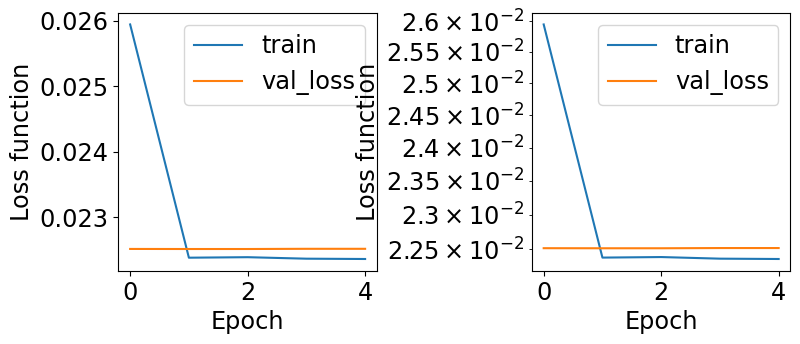

In [81]:
model.evaluate(dataset_train.take(16))
plf.plotTrainHistory(history)
print("model weights")
print(model.get_layer('output').weights[0].numpy()[:, 0])

5) oszacowanie wydajności modelu na danych testowych

In [84]:
# dataset_test = dataset.batch(batchSize).map(square_features).take(nStepsPerEpoch).cache()
dataset_test = dataset.batch(128).map(square_features).take(32).cache()
y_pred = model.predict(dataset_test)
y_true = np.array([y.numpy() for x, y in dataset_test.unbatch()]) #to jest źle, bo losujemy jeszcze raz, naprawiamy przez dodanie chace
pull = (y_pred.flatten() - y_true.flatten()) / y_true.flatten()
accuracy_mask = np.mean(np.abs(pull) <= 0.01)
print(f"Accuracy (within 1%): {accuracy_mask}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Accuracy (within 1%): 0.0498046875


W systuacji gdy zawartość obiektu `tf.Dastaset` pochodzi z generatora, jest ona generowana **za każdym**
pobraniem elementu zbioru.

**Proszę:**

* rozwiązać problem z różnicą wyników na zbiorach treningowym i testowym
* narysować histogram różnicy względnej:

$$
{\huge
\mathrm{pull} = \frac{\mathrm{model} - \mathrm{true}}{\mathrm{true}}
}
$$

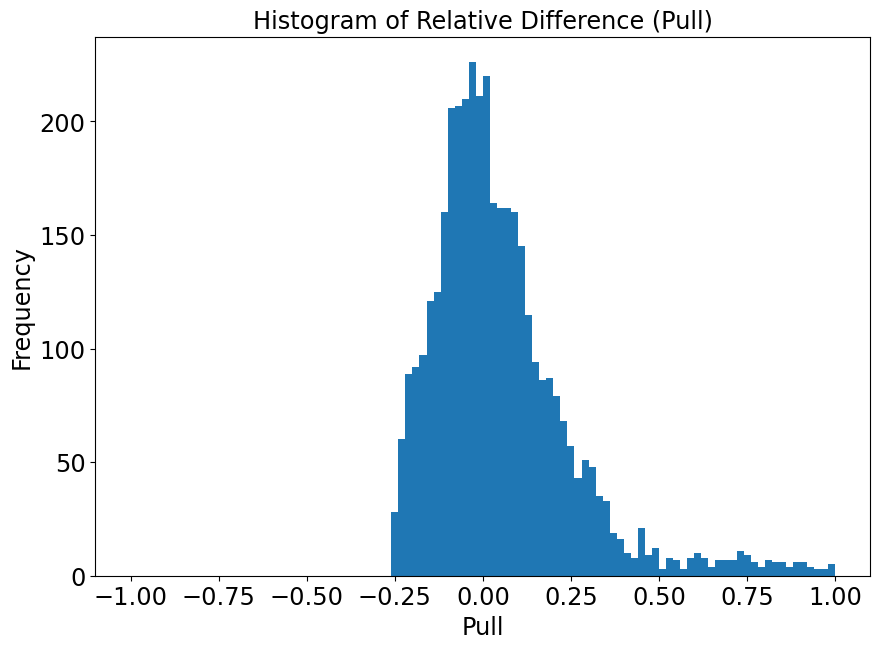

In [88]:
plt.hist(pull, bins=100, range = (-1, 1))  # Create the histogram with 50 bins
plt.xlabel('Pull')       # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.title('Histogram of Relative Difference (Pull)')  # Set title
plt.show()

## Zbiory danych w TensorFlow datasets

Środowisko TensorFlow dostarcza wygodnego iterfejsu użytkownika do dostępu do publicznych zbiorów danych (podobnie jak inne pakiety):
[TensorFlow Datasets](https://www.tensorflow.org/datasets).


In [89]:
import tensorflow_datasets as tfds

#Create a dataset builder object
mnist_builder = tfds.builder('mnist')

#Download the dataset as a dictionary of tf.data.Datasets
data_dir = "../data/tensorflow_datasets/"

datasets, ds_info = tfds.load("mnist",
                              data_dir = data_dir,
                              with_info=True)

#Download the dataset as a tuple of tf.data.Datasets
#datasets, ds_info = tfds.load("mnist", as_supervised=True, with_info=True)

# Load data from disk as tf.data.Datasets
train_dataset, test_dataset = datasets['train'], datasets['test']

# Fetch the first batch of the dataset
item = next(iter(train_dataset.batch(16)))

print(colored("Features shape:", "blue"), item['image'].shape)
print(colored("Labels shape:", "blue"), item['label'].shape)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling ../data/tensorflow_datasets/mnist/incomplete.Y832QL_3.0.1/mnist-train.tfrecord*...:   0%|          |…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling ../data/tensorflow_datasets/mnist/incomplete.Y832QL_3.0.1/mnist-test.tfrecord*...:   0%|          | …

Dataset mnist downloaded and prepared to ../data/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Features shape: (16, 28, 28, 1)
Labels shape: (16,)


Biblioteka `tensorflow_datasets` dostarcza użytecznej funkcji do testu  wydajności wczytytywania zbioru danych:

```Python
tfds.benchmark(train_dataset, # Obiekt który dostarcza interfejsu iteratora
                batch_size)   # Liczba służąca do normalizacji liczby wczytanych przykładów.
                              # Podział na paczki trzeba ustawić na zbiorze explicite.
```

**Proszę:**

* uruchomić dwukrotnie test wydajności na zbiorze MNIST wczytanym z użyciem modułu `tensorflow_datasets` dla paczki o rozmiarze `32`

In [90]:

# Set batch size
batch_size = 32
train_dataset = train_dataset.batch(batch_size)

# Run the benchmark twice
print("Benchmark Run 1:")
tfds.benchmark(train_dataset, batch_size=batch_size)

print("\nBenchmark Run 2:")
tfds.benchmark(train_dataset, batch_size=batch_size)

Benchmark Run 1:

************ Summary ************



  0%|          | 0/1875 [00:00<?, ?it/s]

Examples/sec (First included) 8937.94 ex/sec (total: 60032 ex, 6.72 sec)
Examples/sec (First only) 161.06 ex/sec (total: 32 ex, 0.20 sec)
Examples/sec (First excluded) 9205.48 ex/sec (total: 60000 ex, 6.52 sec)

Benchmark Run 2:

************ Summary ************



  0%|          | 0/1875 [00:00<?, ?it/s]

Examples/sec (First included) 91622.79 ex/sec (total: 60032 ex, 0.66 sec)
Examples/sec (First only) 1188.68 ex/sec (total: 32 ex, 0.03 sec)
Examples/sec (First excluded) 95497.68 ex/sec (total: 60000 ex, 0.63 sec)


,duration,num_examples,avg
first+lasts,0.655208,60032,91622.790255
first,0.026921,32,1188.678094
lasts,0.628288,60000,95497.682040


Funkcja `tfds.show_examples(...)` pozwala na szybkie wyświetlenie przykładów z podanego zbioru.

**Uwaga:** funkcja wymaga obiektu `dataset_info.DatasetInfo`

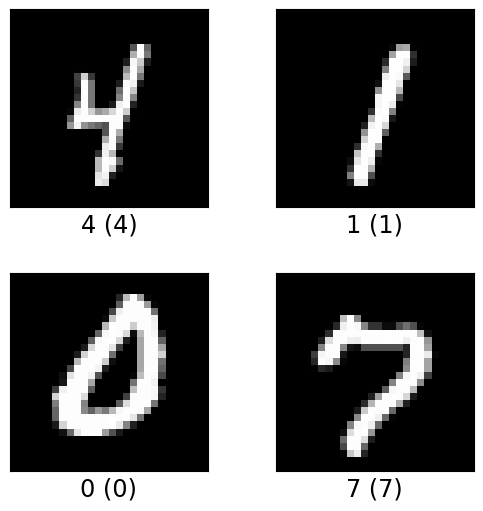

In [93]:
fig = tfds.show_examples(datasets['train'], ds_info, rows = 2, cols = 2)
plt.show()

# Zadanie domowe

**Proszę:**

* napisać funkcję `load_wksf_dataset(filePath)` wczytującą i wstępnie przetwarzającą  zbiór fragmentów tekstow w języku polskim: [link](https://drive.google.com/drive/folders/18vDJPEZd2C6_-TualBIhsR5zmbhDA00D?usp=drive_link), pochodzący ze [Wzbogaconego korpusu słownika frekwencyjnego polszczyzny współczesnej](https://clarin-pl.eu/dspace/handle/11321/715)
* funkcja powinna wykonywać następujące kroki:
  * wczytywanie wszystkich plików w katalogu podanym jako `filePath` do obiektu `tf.data.Dataset`
  * przetwarzanie powstałego obiektu `tf.data.Dataset` by usunąć:
    * informację o źródle cytatu
    * odnośniki w tekście
    * sekwencje: `[/]`

* funkcję należy umieścić w pliku `text_functions.py`
 * uruchomić komórkę poniżej

**Wskazówka:**
* można użyć funkcji `tf.strings.regex_full_match(...)` oraz `tf.strings.regex_replace(...)` do filtrowania linii lub zastępowania
  fragmentów napisów
  

In [ ]:
import sys

import text_functions as txtfunc
importlib.reload(txtfunc)

filePath = "../data/wksf/Korpus_surowy/"
dataset = txtfunc.load_wksf_dataset(filePath)

for item in dataset.take(5):
    print(colored("Item:","blue"), end=" ")
    print(item.numpy().decode("utf-8"))